In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
from run_simulation import invasion_main

In [2]:
simulation_df = invasion_main(10)
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10
0,Cook,0.1,5.659005e-02,3.614460e-02,2.402725e-02,0.016804,0.011931,0.009078,0.006031,0.004060,0.002792,0.001978
1,DuPage,0.0,2.224685e-02,2.570154e-02,2.202642e-02,0.014395,0.010644,0.008474,0.006266,0.003825,0.002744,0.001834
2,Kane,0.3,1.543560e-01,8.253709e-02,4.606973e-02,0.026672,0.016300,0.010669,0.006787,0.004482,0.003246,0.002292
3,Will,0.0,1.646278e-02,1.467241e-02,1.310739e-02,0.010007,0.007929,0.006062,0.004345,0.003053,0.002041,0.001549
4,Winnebago,0.0,6.895011e-02,7.031263e-02,5.525773e-02,0.040010,0.031534,0.023264,0.016154,0.010684,0.006950,0.004301
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,1.470000e-06,4.640000e-06,1.527000e-05,0.000032,0.000048,0.000058,0.000055,0.000046,0.000050,0.000050
98,Calhoun,0.0,1.336650e-03,2.172130e-03,2.238870e-03,0.002040,0.001881,0.001713,0.001294,0.000952,0.000691,0.000461
99,Schuyler,0.0,3.400000e-07,3.640000e-06,1.338000e-05,0.000024,0.000033,0.000042,0.000047,0.000047,0.000046,0.000044
100,Gallatin,0.0,7.000000e-08,7.400000e-07,1.300000e-06,0.000003,0.000006,0.000008,0.000009,0.000009,0.000010,0.000011


In [3]:
visual_df = simulation_df.T
visual_df.columns = visual_df.iloc[0]
visual_df = visual_df.drop(visual_df.index[0])
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.05659,0.022247,0.154356,0.016463,0.06895,0.010655,0.013122,0.020318,0.016171,0.251026,...,0.000089,0.00007,0.000005,0.000001,0.000027,0.000001,0.001337,0.0,0.0,0.0
Week 2,0.036145,0.025702,0.082537,0.014672,0.070313,0.009881,0.016425,0.021031,0.014133,0.13032,...,0.00023,0.000165,0.000095,0.00001,0.000143,0.000005,0.002172,0.000004,0.000001,0.0
Week 3,0.024027,0.022026,0.04607,0.013107,0.055258,0.007586,0.015127,0.021325,0.0129,0.069358,...,0.000463,0.00027,0.000195,0.000018,0.000247,0.000015,0.002239,0.000013,0.000001,0.0
Week 4,0.016804,0.014395,0.026672,0.010007,0.04001,0.007152,0.012819,0.015414,0.010783,0.037917,...,0.000423,0.000317,0.00024,0.000032,0.000316,0.000032,0.00204,0.000024,0.000003,0.000003
Week 5,0.011931,0.010644,0.0163,0.007929,0.031534,0.00681,0.009231,0.01035,0.008259,0.020932,...,0.000512,0.000377,0.000258,0.000041,0.000392,0.000048,0.001881,0.000033,0.000006,0.000003
Week 6,0.009078,0.008474,0.010669,0.006062,0.023264,0.004918,0.006961,0.007278,0.006006,0.012338,...,0.000519,0.000362,0.000267,0.000047,0.000393,0.000058,0.001713,0.000042,0.000008,0.000003
Week 7,0.006031,0.006266,0.006787,0.004345,0.016154,0.003688,0.005127,0.004496,0.004706,0.00742,...,0.000419,0.00032,0.000255,0.000045,0.000342,0.000055,0.001294,0.000047,0.000009,0.000003
Week 8,0.00406,0.003825,0.004482,0.003053,0.010684,0.002865,0.003674,0.002871,0.003348,0.004659,...,0.000343,0.000309,0.000217,0.000051,0.000299,0.000046,0.000952,0.000047,0.000009,0.000006
Week 9,0.002792,0.002744,0.003246,0.002041,0.00695,0.001867,0.002637,0.001752,0.002366,0.002922,...,0.000278,0.000258,0.000186,0.000045,0.000246,0.00005,0.000691,0.000046,0.00001,0.000006


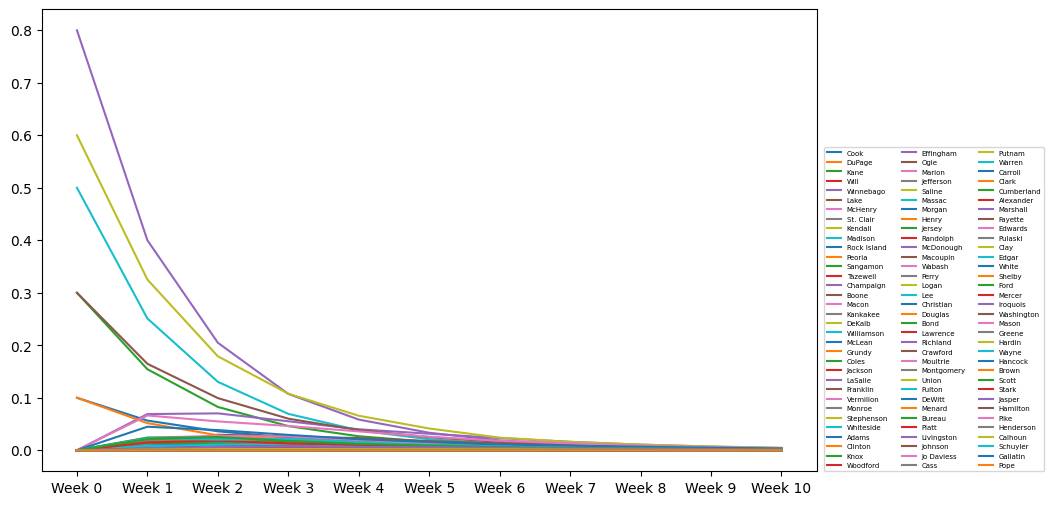

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [12]:
min_value = simulation_df['Week 0'].min()
max_value = simulation_df['Week 0'].max()
cmap = matplotlib.colormaps['viridis']

node_colors = {}
for node in CG.nodes():
    if node.name in simulation_df['County'].values:
        value = simulation_df.loc[simulation_df['County'] == node.name, 'Week 0'].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)
    else:
        # Handle nodes not present in the DataFrame (optional: set a default color)
        node_colors[node.name] = 'gray'  # or any other color for nodes not in the DataFrame

# print(node_colors)

<function matplotlib.pyplot.show(close=None, block=None)>

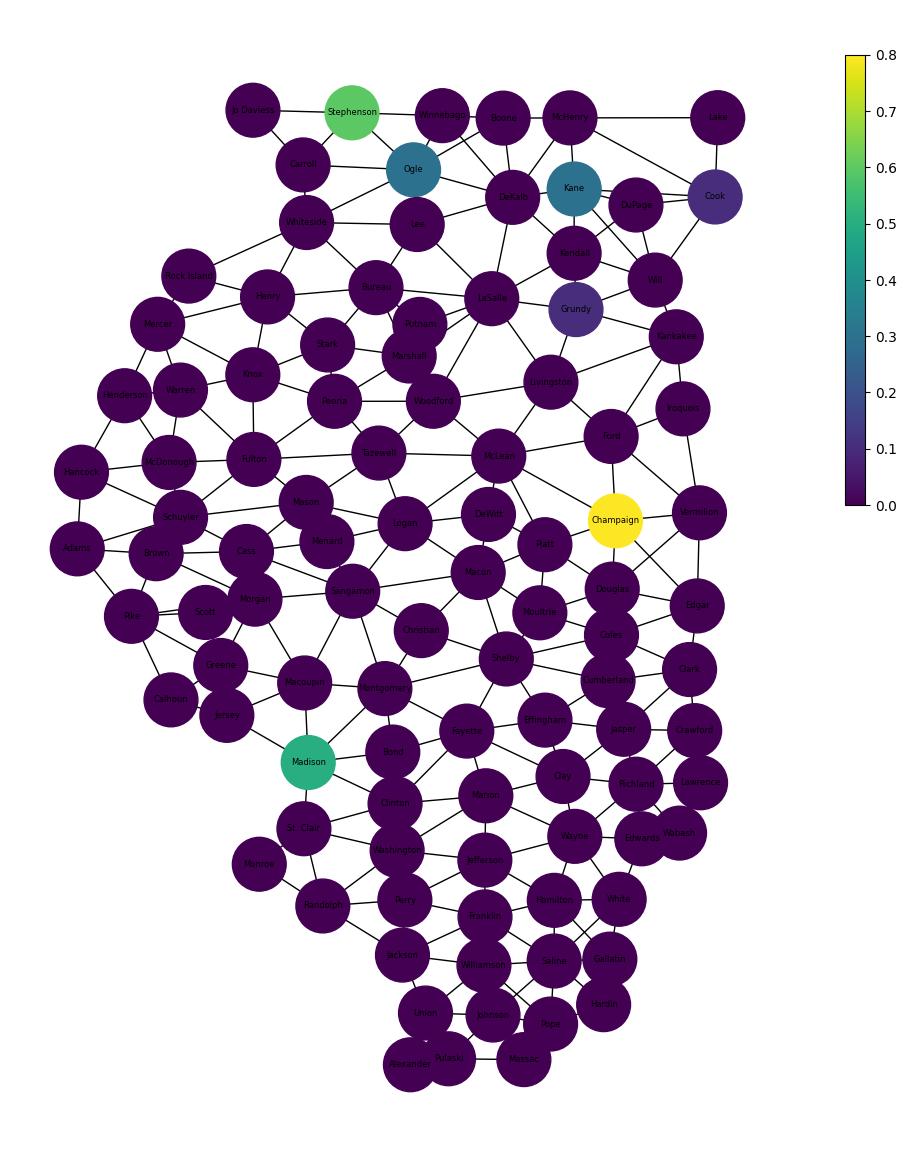

In [15]:
labels = {node: handler[node.name].name for node in CG.nodes()}
fig, ax = plt.subplots(figsize=(10, 15))
node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
nx.draw(CG, 
        pos=node_positions,
        ax=ax, 
        node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
        node_size=1500, )

nx.draw_networkx_labels(CG, pos=node_positions, labels=labels, font_size=6, ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])
sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
plt.colorbar(sm, cax=sub_ax)
plt.show